In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import randn
from scipy import stats

%matplotlib inline

In [5]:
dataset = randn(25)

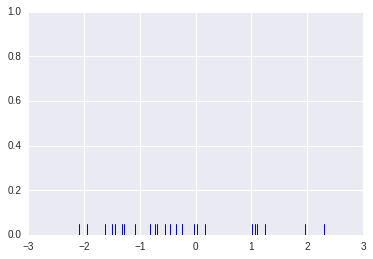

In [6]:
sns.rugplot(dataset)

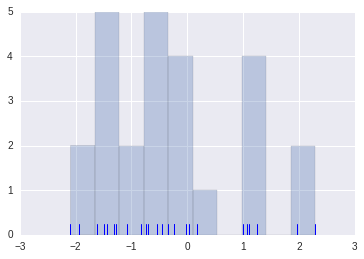

In [7]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

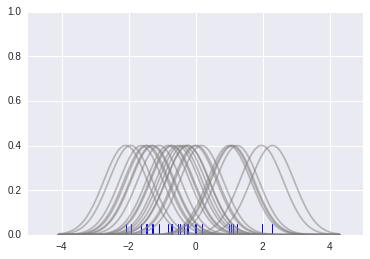

In [17]:
sns.rugplot(dataset)

x_min = dataset.min()-2
x_max = dataset.max()+2

x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ( (4 * dataset.std() ** 5) / (3 * len(dataset)) ) ** 0.2

kernel_list = []

for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)

plt.ylim(0,1)

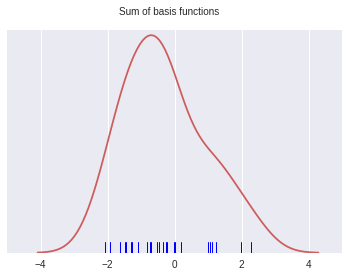

In [11]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)

plt.yticks([])
plt.suptitle("Sum of basis functions")

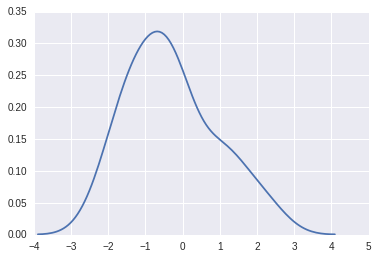

In [12]:
sns.kdeplot(dataset)

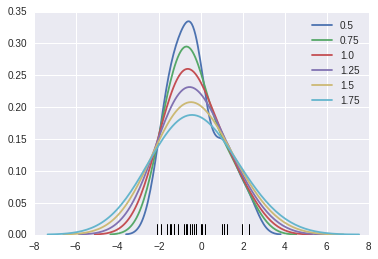

In [15]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5,2,0.25):
    # lw - line weight
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)

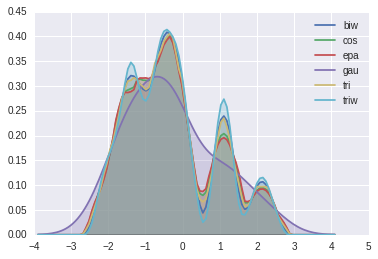

In [19]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel=kern, label=kern, shade=True)

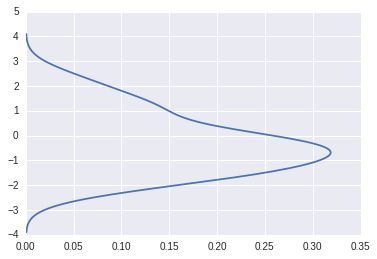

In [20]:
sns.kdeplot(dataset, vertical=True)

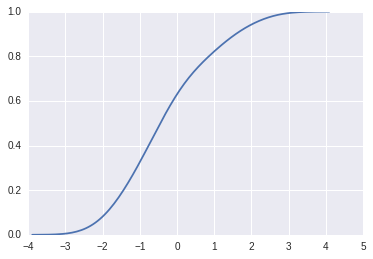

In [21]:
sns.kdeplot(dataset, cumulative=True)

In [22]:
dataset.max()

2.2941903480895953

In [25]:
mean = [0,0]
cov = [[1,0],[0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns=list('XY'))
dframe.head()

,X,Y
0,0.340629,-14.628576
1,0.408226,1.786166
2,0.509971,0.947831
3,-1.493090,-20.840480
4,2.253989,-14.131175


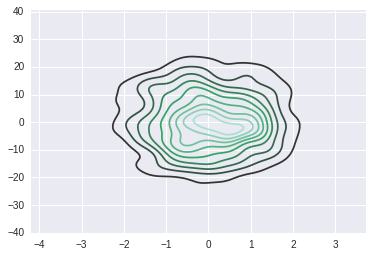

In [26]:
sns.kdeplot(dframe)

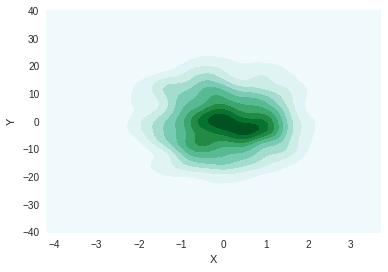

In [28]:
sns.kdeplot(dframe.X, dframe.Y, shade=True)

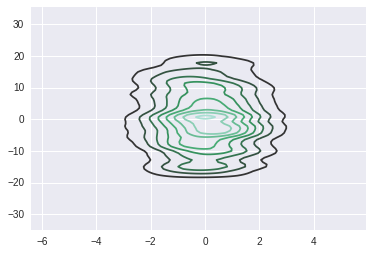

In [29]:
sns.kdeplot(dframe, bw=1)

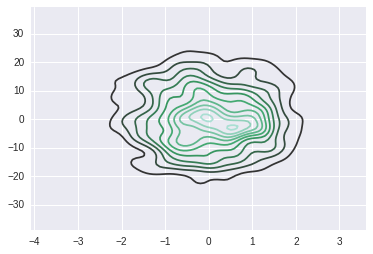

In [30]:
sns.kdeplot(dframe, bw='silverman')

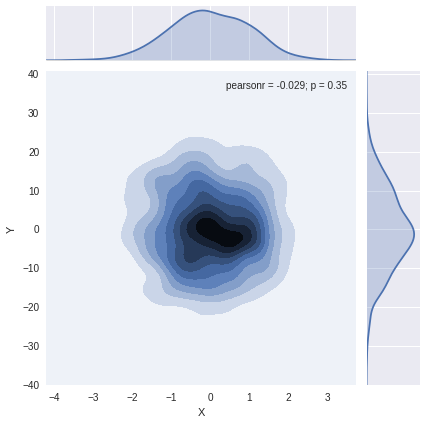

In [31]:
sns.jointplot('X', 'Y', dframe, kind='kde')